In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import sympy as sp

# Problem 1

In [2]:
data = pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
dat = data.iloc[:, 2:]

In [4]:
X = dat.iloc[:, :-1]
y = dat[' shares']

In [5]:
y_tr = np.log(y)

### Part A


In [6]:
X.shape

(39644, 58)

In [7]:
np.linalg.matrix_rank(X)

56

There are multiple ways to try to sus out where things might be linearly dependent in a dataframe. Several methods that come to mind are SVD, QR, PCA, and even basic correlation analysis.

**Failed try 1**

In [17]:
# q,r = np.linalg.qr(X.T)
# r

**Failed try 2**

In [61]:
# Well, that didn't work....
# reduced_form, inds = sp.Matrix(X.values).T.rref()
# dep_X = X[X.columns.difference(inds)]
# dep_X

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,abs_title_sentiment_polarity,abs_title_subjectivity,average_token_length,avg_negative_polarity,avg_positive_polarity,...,self_reference_min_shares,title_sentiment_polarity,title_subjectivity,weekday_is_friday,weekday_is_monday,weekday_is_saturday,weekday_is_sunday,weekday_is_thursday,weekday_is_tuesday,weekday_is_wednesday
0,0.500331,0.378279,0.040005,0.041263,0.040123,0.187500,0.000000,4.680365,-0.350000,0.378636,...,496.0,-0.187500,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.799756,0.050047,0.050096,0.050101,0.050001,0.000000,0.500000,4.913725,-0.118750,0.286915,...,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.217792,0.033334,0.033351,0.033334,0.682188,0.000000,0.500000,4.393365,-0.466667,0.495833,...,918.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.028573,0.419300,0.494651,0.028905,0.028572,0.000000,0.500000,4.404896,-0.369697,0.385965,...,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.028633,0.028794,0.028575,0.028572,0.885427,0.136364,0.045455,4.682836,-0.220192,0.411127,...,545.0,0.136364,0.454545,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.025038,0.025001,0.151701,0.025000,0.773260,0.000000,0.400000,4.523121,-0.260000,0.333791,...,11400.0,0.000000,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39640,0.029349,0.028575,0.231866,0.681635,0.028575,1.000000,0.200000,4.405488,-0.211111,0.374825,...,2100.0,1.000000,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39641,0.159004,0.025025,0.025207,0.643794,0.146970,0.136364,0.045455,5.076923,-0.356439,0.307273,...,1400.0,0.136364,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39642,0.040004,0.040003,0.839987,0.040002,0.040004,0.000000,0.500000,4.975073,-0.205246,0.236851,...,452.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**It was a thought...**

In [32]:
# X_corr = X.corr().abs().unstack()
# X_corr = X_corr[X_corr.index.get_level_values(0) != X_corr.index.get_level_values(1)]
# X_corrs = X_corr[X_corr < 1][~X_corr.index.duplicated()].sort_values(ascending=False)
# pd.DataFrame(X_corrs, columns=['value']).drop_duplicates(subset=['value'])[:10]

**Also failed**

In [67]:
# df = pd.DataFrame(X)

# U, s, VT = np.linalg.svd(df)

# tolerance = 1e-20  
# dep_cols = []
# for i, sv in enumerate(s):
#     if np.isclose(sv, 0, atol=tolerance):
#         dep_cols.append(i)

# dep_cols = df.columns[dep_cols]
# dep_cols

Index([], dtype='object')

In [8]:
cols = list(X.columns)
content = cols[:10]
category = cols[11:16]
shared = cols[17:28]
week = cols[29:36]
topics = cols[37:41]
polarity = cols[42:]

In [50]:
content

[' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length']

In [51]:
category

[' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech']

In [52]:
shared

[' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares']

In [54]:
week

[' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday']

In [55]:
topics

[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03']

In [56]:
polarity

[' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' avg_positive_polarity',
 ' min_positive_polarity',
 ' max_positive_polarity',
 ' avg_negative_polarity',
 ' min_negative_polarity',
 ' max_negative_polarity',
 ' title_subjectivity',
 ' title_sentiment_polarity',
 ' abs_title_subjectivity',
 ' abs_title_sentiment_polarity']

In [9]:
threshold = 0.9  # Set your threshold here
pairs = {}
X_corr = X.corr()

for i in range(len(X_corr.columns)):
    for j in range(i+1, len(X_corr.columns)):
        corr_val = X_corr.iloc[i, j]
        if abs(corr_val) > threshold:
            pairs[(X_corr.columns[i], X_corr.columns[j])] = corr_val

print("Highly correlated pairs with correlation values:")
for pair, corr_value in pairs.items():
    print(pair, ":", corr_value)


Highly correlated pairs with correlation values:
(' n_unique_tokens', ' n_non_stop_words') : 0.9995717371218911
(' n_unique_tokens', ' n_non_stop_unique_tokens') : 0.9998515160178297
(' n_non_stop_words', ' n_non_stop_unique_tokens') : 0.9995323282505376
(' kw_max_min', ' kw_avg_min') : 0.9405286635291802


I find this confusing. As when I checked the generall `X_corr`, there's a lot of correlation among highly related columns. For example, while the threshold is quite high in checking pairs above, all 3 of the listed pairs obviously make sense. More words = more unique words, mor or less. So I'm unsure how we're concluding there are only 2 dependent columns, even though obviously checking `rank()` showed that there must be 2, but so far I have been unable to identify the 2 in question because of computing and rounding errors I suppose in the methods I've tried so far. Do I have to manually try to figure it out? Because that's just.... not it.

I'm going to make the executive choice to drop `n_non_stop_words` and `n_unique_tokens`. I have no idea if that's what we're supposed to do but, as explained in the above paragraph, I'm not keen to spend more time on this particular little stumbling block than I have (which has, unfortunately, probably been a lot more time than it should have been).

In [10]:
X_new = X.drop(columns=[" n_non_stop_words"," n_unique_tokens"],axis=1)

In [11]:
X_new.head(4)

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875
1,9.0,255.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000
2,9.0,211.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000
3,9.0,531.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000


#### Aside: brute forcing, but still have problems. Is the homework wording outdated?

In [15]:
def check_rank(df, target_rank):
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns):
            if i < j:
                # Drop the current pair of columns
                temp_df = df.drop(columns=[col1, col2])
                # Check the rank of the resulting DataFrame
                rank = np.linalg.matrix_rank(temp_df.values)
                if rank == target_rank:
                    return temp_df.copy()  # Returning the DataFrame as a new object
    return None  

target_rank = 56  # Change this to your desired rank

result_df = check_rank(X, target_rank)
if result_df is not None:
    print("DataFrame with rank {}:".format(target_rank))
    print(result_df)
else:
    print("Target rank {} not reached.".format(target_rank))

DataFrame with rank 56:
        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                       0.815385         4.0              2.0        1.0   
1                       0.791946         3.0              1.0      

In [16]:
result_df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [17]:
def column_difference(df1, df2):
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)
    
    # Columns present in df1 but not in df2
    in_df1_not_df2 = columns_df1 - columns_df2
    
    # Columns present in df2 but not in df1
    in_df2_not_df1 = columns_df2 - columns_df1
    
    return in_df1_not_df2, in_df2_not_df1


# Find the difference in column names
diff_df1_df2, diff_df2_df1 = column_difference(X, result_df)

print("Columns present in df1 but not in df2:", diff_df1_df2)
print("Columns present in df2 but not in df1:", diff_df2_df1)


Columns present in df1 but not in df2: {' weekday_is_saturday', ' n_non_stop_words'}
Columns present in df2 but not in df1: set()


These two columns from above are not in the same category, as implied by the homework wording.

### Part B

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_new), columns = X_new.columns)


In [19]:
X_scaled['dummy'] = 1

X_train = X_scaled[:2000]
y_train = y_tr[:2000]
X_test = X_scaled[2000:]
y_test = y_tr[2000:]

**Part i**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

linreg.fit(X_train, y_train)
linreg_preds = linreg.predict(X_test)

In [21]:
correlation = np.corrcoef(linreg_preds, y_test)[0, 1]
correlation

0.00663967840032264

In [22]:
top_atts = pd.DataFrame(abs(linreg.coef_), columns=["value"]).sort_values(by='value', ascending=False)
top_10_atts = top_atts.index[:10] ## trying to get top 10 att index to go back and find the actual atts themselves

In [23]:
def find_items_by_indexes(indexes, items):
    return [items[i] for i in indexes]

# Example usage:
indexes = list(top_10_atts)
items = X_scaled.columns

result = find_items_by_indexes(indexes, items)

In [24]:
final = dict(zip(result, top_atts["value"][:10]))
final

{' weekday_is_sunday': 2275498266076.4404,
 ' weekday_is_saturday': 2162481694619.627,
 ' weekday_is_wednesday': 1855461679539.295,
 ' weekday_is_tuesday': 1851129885251.4631,
 ' weekday_is_thursday': 1839156832866.9768,
 ' weekday_is_monday': 1777205614055.6316,
 ' weekday_is_friday': 1667913465340.3242,
 ' is_weekend': 1424185708995.6855,
 ' LDA_03': 2437555856.1567383,
 ' LDA_04': 2387950570.8406982}

I honestly find this kind of hard to believe... but in theory my process is sound? I know day of week certainly plays a role in popularity and the time of day etc., but it's still surprising. I guess maybe the data is lacking other attribute info that could likely play significant roles in affecting the popularity of an article by number of shares.

**Part ii**

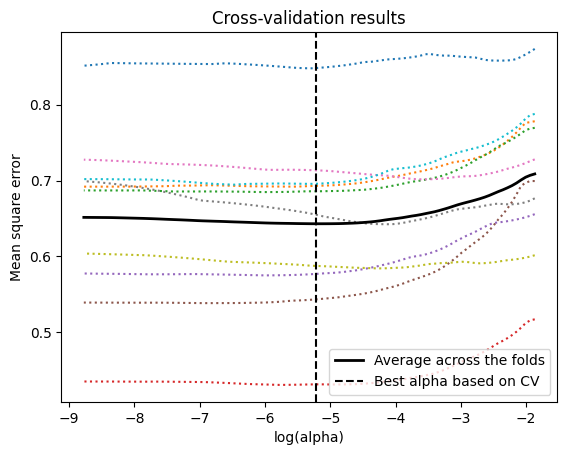

Best alpha: 0.005420984393016474
MSE 0.85732884846668


In [25]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

lasso = LassoCV(cv=10)
lasso.fit(X_train, y_train)

# CV plotting via help from Chat-GPT to translate the example code line about plotting from homework PDF
plt.figure()
plt.plot(np.log(lasso.alphas_), lasso.mse_path_, ':')
plt.plot(np.log(lasso.alphas_), lasso.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log(lasso.alpha_), linestyle='--', color='k',
            label='Best alpha based on CV')
plt.legend()
plt.xlabel('log(alpha)')
plt.ylabel('Mean square error')
plt.title('Cross-validation results')
plt.show()


w_best = lasso.coef_
lasso_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)

print("Best alpha:", lasso.alpha_)
print("MSE", mse)


In [26]:
correlation = np.corrcoef(lasso_pred, y_test)[0, 1]
correlation

0.23504209838860216

In [27]:
top_atts = pd.DataFrame(abs(lasso.coef_), columns=["value"]).sort_values(by='value', ascending=False)
top_10_atts = top_atts.index[:10] ## trying to get top 10 att index to go back and find the actual atts themselves

def find_items_by_indexes(indexes, items):
    return [items[i] for i in indexes]

# Example usage:
indexes = list(top_10_atts)
items = X_scaled.columns

result = find_items_by_indexes(indexes, items)

In [28]:
final = dict(zip(result, top_atts["value"][:10]))
final

{' self_reference_min_shares': 0.2065367933582175,
 ' is_weekend': 0.10350978591132085,
 ' data_channel_is_tech': 0.08474128947178904,
 ' data_channel_is_socmed': 0.08024472785479828,
 ' data_channel_is_bus': 0.07944308184021821,
 ' abs_title_sentiment_polarity': 0.0672150378783103,
 ' weekday_is_saturday': 0.06083173274792446,
 ' data_channel_is_entertainment': 0.0584413514528953,
 ' n_tokens_content': 0.05347038316637446,
 ' kw_avg_avg': 0.04695114305436272}

This is certainly interesting and feels more plausable/accurate than the previous MLR.

### Part C

Kernel regression with 
$$\Kappa(x_i,x_j) = exp(-\gamma ||x_i - x_j||_2^2)$$

Let $\gamma = 10^{-7}$ and $\lambda = 0.001$.

In [29]:
from sklearn.kernel_ridge import KernelRidge


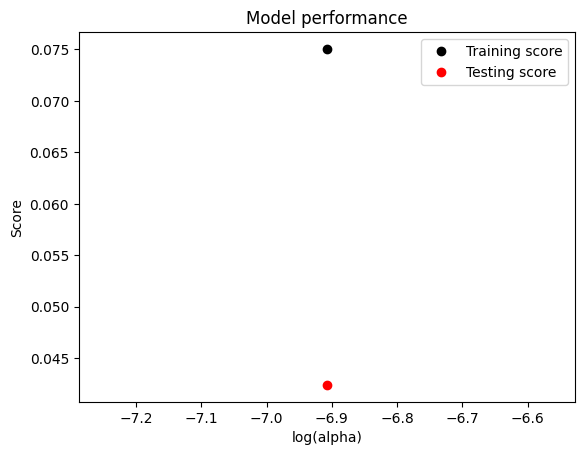

Gamma: 1e-07
Lambda: 0.001
MSE: 0.8369732825985596


In [31]:

# Set the parameters
gamma = 1e-7
alpha = 0.001

# Initialize KernelRidge with the RBF kernel and the specified parameters
kr = KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma)
kr.fit(X_train, y_train)

# CV plotting (Note: Since we're not performing a grid search, we're not plotting CV results)
plt.figure()
plt.plot([np.log(alpha)], [kr.score(X_train, y_train)], 'ko', label='Training score')
plt.plot([np.log(alpha)], [kr.score(X_test, y_test)], 'ro', label='Testing score')
plt.xlabel('log(alpha)')
plt.ylabel('Score')
plt.title('Model performance')
plt.legend()
plt.show()

# Prediction and evaluation
kr_pred = kr.predict(X_test)
mse = mean_squared_error(y_test, kr_pred)

print("Gamma:", gamma)
print("Lambda:", alpha)
print("MSE:", mse)


In [32]:
correlation = np.corrcoef(kr_pred, y_test)[0, 1]
correlation

0.26290856679093016

### Part D

In [40]:
X_2 = X_new
for col in shared:
    # Replace negative or zero values with 1e-8
    X_2[col] = X_2[col].apply(lambda x: 1e-8 if x <= 0 else x)

In [42]:
for col in shared:
    # Replace negative or zero values with 1e-8
    X_2[col] = np.log(X_2[col])

In [44]:
X_2_scaled = pd.DataFrame(scaler.fit_transform(X_2), columns = X_2.columns)
X_2_scaled['dummy'] = 1

X_train = X_2_scaled[:2000]
y_train = y_tr[:2000]
X_test = X_2_scaled[2000:]
y_test = y_tr[2000:]

Linear regression.

In [45]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
linreg_preds = linreg.predict(X_test)

correlation = np.corrcoef(linreg_preds, y_test)[0, 1]
correlation

0.006639681063682324

Lasso regression.

In [47]:
lasso = LassoCV(cv=10)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

correlation = np.corrcoef(lasso_pred, y_test)[0, 1]
correlation

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3571293718364359, tolerance: 0.12565196510989177
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49514289356852714, tolerance: 0.12565196510989177
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5601990509753705, tolerance: 0.12565196510989177
  model = cd_fast.ene

0.22620668393751853

Kernel ridge.

In [48]:
# Set the parameters
gamma = 1e-7
alpha = 0.001

# Initialize KernelRidge with the RBF kernel and the specified parameters
kr = KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma)
kr.fit(X_train, y_train)
kr_pred = kr.predict(X_test)

correlation = np.corrcoef(kr_pred, y_test)[0, 1]
correlation

0.2417174549496222

Out of the 3, the Kernel Ridge Regression has the highest correlation coefficient.

The results appear to largely remain the same, regardless of whether the group 3 features are transformed with the natural log.